In [121]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt

# fetch dataset
real_estate_valuation = fetch_ucirepo(id=477)

# data (as pandas dataframes)
X = real_estate_valuation.data.features
y = real_estate_valuation.data.targets

df = X[['X2 house age']]
df


AttributeError: 'Index' object has no attribute '_format_flat'

     X2 house age
0            32.0
1            19.5
2            13.3
3            13.3
4             5.0
..            ...
409          13.7
410           5.6
411          18.8
412           8.1
413           6.5

[414 rows x 1 columns]

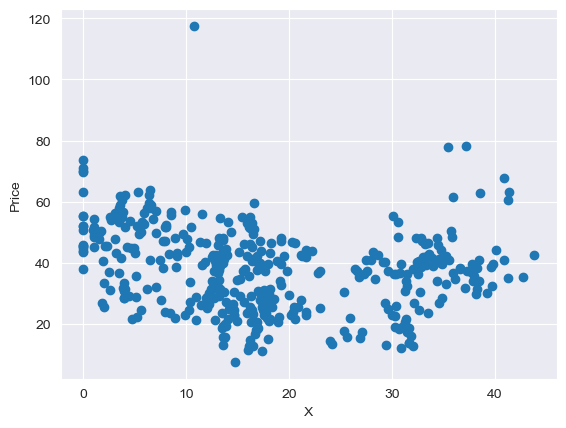

In [122]:
# Ensure df and df2 have the same number of rows
if len(X) == len(y):
    plt.scatter(df, y.iloc[:, 0])  # Assuming you want to plot the first column of each DataFrame
    plt.xlabel('X')
    plt.ylabel('Price')
    plt.show()
else:
    print("Error: df and df2 do not have the same number of rows.")

In [123]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df, y)
b0 = model.intercept_ # note the underscore!
b1 = model.coef_[0] # returns a list containing a single element
print(b0, b1)

[42.43469705] [-0.25148842]


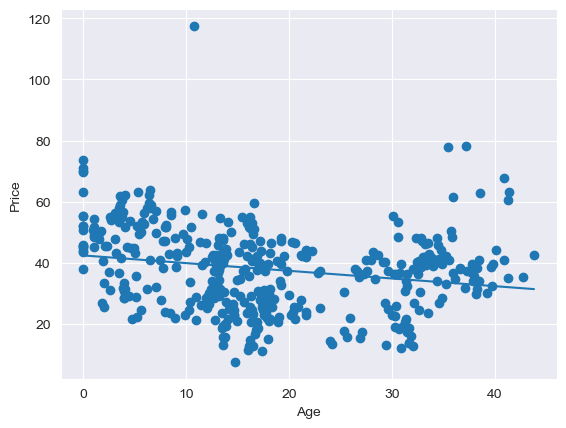

In [124]:
import numpy as np

xs = np.linspace(df.min(), df.max())
ys = b0 + b1 * xs
plt.plot(xs, ys)
plt.scatter(df, y)
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

In [125]:
from sklearn.metrics import mean_absolute_error

preds = model.predict(df)

print("Mean absolute error: %.2f" % mean_absolute_error(y, preds))

Mean absolute error: 10.52


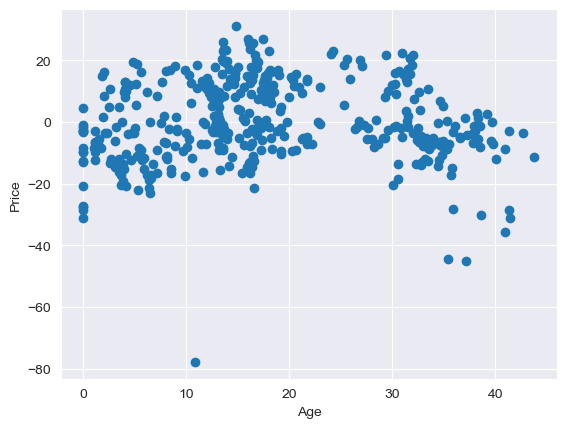

In [126]:
plt.scatter(df, preds - y)

plt.xlabel('Age')
plt.ylabel('Price')
plt.show()